<a href="https://colab.research.google.com/github/youngmook/cheminfo-python/blob/main/cheminfo_in_python-20230608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RDKit (Cheminformatics tool) 설치

In [2]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 77.7 MB/s eta 0:00:00


## RDKit 불러오기


In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

## MDL Mol 파일을 읽고 쓰기를 해보자

1-Propoxyhexane 분자를 만들어 보자 (SMILES 코드를 이용하자)

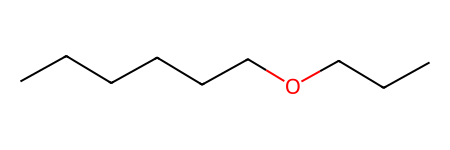

In [4]:
theMol = Chem.MolFromSmiles('CCCCCCOCCC')
theMol

MDL Molfile 문자열 만들기

In [5]:
theMolBlock = Chem.MolToMolBlock(theMol)
print(theMolBlock)


     RDKit          2D

 10  9  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4952    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7942   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    9.0933    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.3923   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   11.6913    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  1  0
  9 10  1  0
M  END



분자 이름 변경하기

In [6]:
theMol.SetProp('_Name','1-Propoxyhexane')
print(Chem.MolToMolBlock(theMol))

1-Propoxyhexane
     RDKit          2D

 10  9  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4952    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7942   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    9.0933    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.3923   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   11.6913    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  1  0
  9 10  1  0
M  END



분자를 MDL Mol파일로 저장하기


In [7]:
theMolName = '1-Propoxyhexane.mol'
print(Chem.MolToMolBlock(theMol),file=open(theMolName, 'w+'))

MDL Mol 파일 불러오기

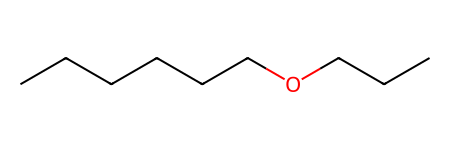

In [8]:
theAnotherMol = Chem.MolFromMolFile(theMolName)
theAnotherMol

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄

In [9]:
theInvalidMolecule1 = Chem.MolFromSmiles('CO(C)C')
theInvalidMolecule1 is None

[20:52:51] Explicit valence for atom # 1 O, 3, is greater than permitted


True

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄 (Kekulize 오류)

In [10]:
theInvalidMolecule1 = Chem.MolFromSmiles('c1cc1')
theInvalidMolecule1 is None

[20:52:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2


True

## RDKit Mol 객체 다루기!!!
분자의 원자 개수 확인

In [11]:
theNumOfAtoms = theMol.GetNumAtoms()
theNumOfAtoms

10

분자의 Bond 개수 확인

In [12]:
theNumOfBonds = theMol.GetNumBonds()
theNumOfBonds

9

분자에 H원자 붙이기

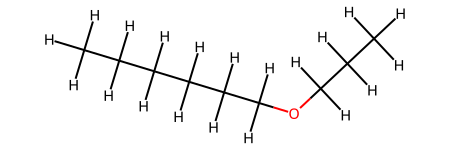

In [13]:
theMolWithHAtoms = Chem.AddHs(theMol)
theMolWithHAtoms

분자구조의 위치를 3차원 좌표값으로 만들기

1-Propoxyhexane
     RDKit          3D

 30 29  0  0  0  0  0  0  0  0999 V2000
    5.0222    0.0003   -0.2588 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6166    0.1871    0.2736 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6884   -0.7421   -0.4558 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2697   -0.6547   -0.0223 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7229    0.7371   -0.2357 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7040    0.8552    0.1918 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5722    0.0216   -0.4692 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8519    0.2435    0.0321 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8913   -0.6282   -0.6308 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2241   -0.2838    0.0066 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1766   -1.0842   -0.4508 H   0  0  0  0  0  0  0  0  0  0  0  0
    5.2049    0.6310   -1.1479 H   0  0  0  0  0  0  0  0  0  0  0  0
    5.7490    0.3081    0.5391 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.3532

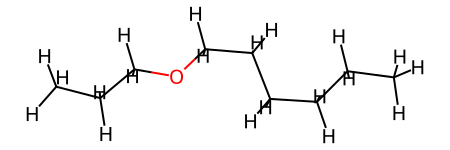

In [14]:
theEmbededMolWithHAtoms = Chem.AddHs(theMol)
AllChem.EmbedMolecule(theEmbededMolWithHAtoms)  
print(Chem.MolToMolBlock(theEmbededMolWithHAtoms))
theEmbededMolWithHAtoms

In [15]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import py3Dmol

def show3DMol(theMol, style='stick'):
    mblock = Chem.MolToMolBlock(theMol)

    view = py3Dmol.view(width=400, height=400)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()

def show3DMolWithOptimization(theMol, style='stick'):
    mol = Chem.AddHs(theMol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=400, height=400)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()
    


In [17]:
show3DMol(theMolWithHAtoms)  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [18]:
show3DMol(theEmbededMolWithHAtoms)  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
show3DMolWithOptimization(theEmbededMolWithHAtoms)  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [20]:
show3DMolWithOptimization(theMolWithHAtoms)  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

분자구조를 2차원으로 만들기

1-Propoxyhexane
     RDKit          2D

 30 29  0  0  0  0  0  0  0  0999 V2000
   -6.0666    0.8406    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6309    0.4061    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1952   -0.0283    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7595   -0.4628    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3238   -0.8973    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1119   -1.3318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5476   -1.7663    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6417   -0.7402    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7358    0.2860    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8300    1.3121    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5023    1.2751    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.6321    2.2763    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -6.5011   -0.5951    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.0654

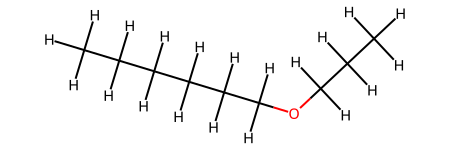

In [21]:
AllChem.Compute2DCoords(theMolWithHAtoms)
print(Chem.MolToMolBlock(theMolWithHAtoms))
theMolWithHAtoms

H원자 지우기

1-Propoxyhexane
     RDKit          2D

 10  9  0  0  0  0  0  0  0  0999 V2000
   -6.0666    0.8406    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6309    0.4061    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1952   -0.0283    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7595   -0.4628    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3238   -0.8973    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1119   -1.3318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5476   -1.7663    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6417   -0.7402    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7358    0.2860    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8300    1.3121    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  1  0
  9 10  1  0
M  END



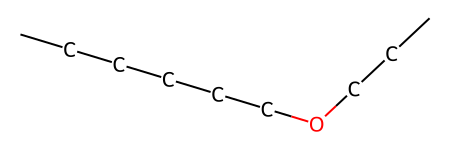

In [22]:
theMol2 = Chem.RemoveHs(theMolWithHAtoms)
print(Chem.MolToMolBlock(theMol2))
theMol2

## Atom과 Bond 다루기

개별 Atom 객체 가져오기

In [23]:
theFirstAtomOfMol = theMol.GetAtomWithIdx(0)
theFirstAtomOfMol

In [24]:
theFirstAtomOfMol.GetAtomicNum()

6

In [25]:
theFirstAtomOfMol.GetMass()

12.011

In [26]:
theFirstAtomOfMol.GetSymbol()

'C'

In [27]:
theNeighbors = theFirstAtomOfMol.GetNeighbors()
theNeighbors

(<rdkit.Chem.rdchem.Atom at 0x7f3abc40b450>,)

원자번호 및 원소기호 출력

In [28]:
#GetAtoms()

for index, ithAtom in enumerate(theMolWithHAtoms.GetAtoms()):
  print(str(index+1).zfill(2), '원자번호: {0}, 원소기호: {1}'.format(ithAtom.GetAtomicNum(), ithAtom.GetSymbol()))


01 원자번호: 6, 원소기호: C
02 원자번호: 6, 원소기호: C
03 원자번호: 6, 원소기호: C
04 원자번호: 6, 원소기호: C
05 원자번호: 6, 원소기호: C
06 원자번호: 6, 원소기호: C
07 원자번호: 8, 원소기호: O
08 원자번호: 6, 원소기호: C
09 원자번호: 6, 원소기호: C
10 원자번호: 6, 원소기호: C
11 원자번호: 1, 원소기호: H
12 원자번호: 1, 원소기호: H
13 원자번호: 1, 원소기호: H
14 원자번호: 1, 원소기호: H
15 원자번호: 1, 원소기호: H
16 원자번호: 1, 원소기호: H
17 원자번호: 1, 원소기호: H
18 원자번호: 1, 원소기호: H
19 원자번호: 1, 원소기호: H
20 원자번호: 1, 원소기호: H
21 원자번호: 1, 원소기호: H
22 원자번호: 1, 원소기호: H
23 원자번호: 1, 원소기호: H
24 원자번호: 1, 원소기호: H
25 원자번호: 1, 원소기호: H
26 원자번호: 1, 원소기호: H
27 원자번호: 1, 원소기호: H
28 원자번호: 1, 원소기호: H
29 원자번호: 1, 원소기호: H
30 원자번호: 1, 원소기호: H


개별 Bond 객체 가져오기

In [29]:
theFirstBond = theMol.GetBondWithIdx(0)
theFirstBond

In [30]:
theFirstBond.GetBeginAtomIdx()

0

In [31]:
theFirstBond.GetEndAtomIdx()

1

In [32]:
theFirstBond.GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

Bond 정보 출력

In [33]:
#GetBonds()

for index, ithBond in enumerate(theMolWithHAtoms.GetBonds()):
  print(str(index+1).zfill(2), '\t시작: {0}, 끝: {1}, Type: {2}'.format( 
      str(ithBond.GetBeginAtomIdx()).zfill(2), 
      str(ithBond.GetEndAtomIdx()).zfill(2), 
      ithBond.GetBondType()))


01 	시작: 00, 끝: 01, Type: SINGLE
02 	시작: 01, 끝: 02, Type: SINGLE
03 	시작: 02, 끝: 03, Type: SINGLE
04 	시작: 03, 끝: 04, Type: SINGLE
05 	시작: 04, 끝: 05, Type: SINGLE
06 	시작: 05, 끝: 06, Type: SINGLE
07 	시작: 06, 끝: 07, Type: SINGLE
08 	시작: 07, 끝: 08, Type: SINGLE
09 	시작: 08, 끝: 09, Type: SINGLE
10 	시작: 00, 끝: 10, Type: SINGLE
11 	시작: 00, 끝: 11, Type: SINGLE
12 	시작: 00, 끝: 12, Type: SINGLE
13 	시작: 01, 끝: 13, Type: SINGLE
14 	시작: 01, 끝: 14, Type: SINGLE
15 	시작: 02, 끝: 15, Type: SINGLE
16 	시작: 02, 끝: 16, Type: SINGLE
17 	시작: 03, 끝: 17, Type: SINGLE
18 	시작: 03, 끝: 18, Type: SINGLE
19 	시작: 04, 끝: 19, Type: SINGLE
20 	시작: 04, 끝: 20, Type: SINGLE
21 	시작: 05, 끝: 21, Type: SINGLE
22 	시작: 05, 끝: 22, Type: SINGLE
23 	시작: 07, 끝: 23, Type: SINGLE
24 	시작: 07, 끝: 24, Type: SINGLE
25 	시작: 08, 끝: 25, Type: SINGLE
26 	시작: 08, 끝: 26, Type: SINGLE
27 	시작: 09, 끝: 27, Type: SINGLE
28 	시작: 09, 끝: 28, Type: SINGLE
29 	시작: 09, 끝: 29, Type: SINGLE


## SMILES 코드 다루기
*   Chiral 표현




     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  1
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



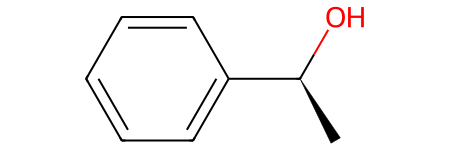

In [34]:
theChiralMol = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
print(Chem.MolToMolBlock(theChiralMol))
theChiralMol

In [35]:
show3DMol(theChiralMol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [36]:
show3DMolWithOptimization(theChiralMol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Chiral 제거


     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END

CC(O)c1ccccc1


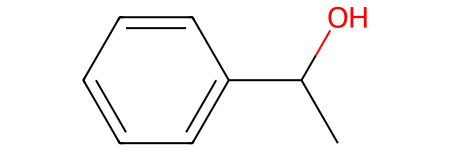

In [37]:
theRemovedChiralMolSmiles = Chem.MolToSmiles(theChiralMol,isomericSmiles=False)
theRemovedChiralMol = Chem.MolFromSmiles(theRemovedChiralMolSmiles)
print(Chem.MolToMolBlock(theRemovedChiralMol))
print(theRemovedChiralMolSmiles)
theRemovedChiralMol

* 기본 SMILES코드는 Canonical SMILES를 제공함

c1ccncc1


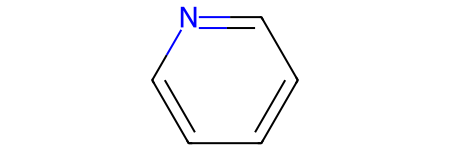

In [38]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
Chem.MolFromSmiles('C1=CC=CN=C1')

c1ccncc1


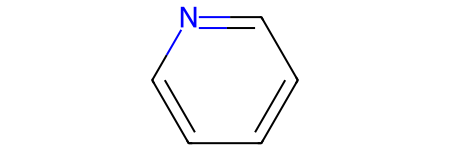

In [39]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
Chem.MolFromSmiles('c1cccnc1')

c1ccncc1


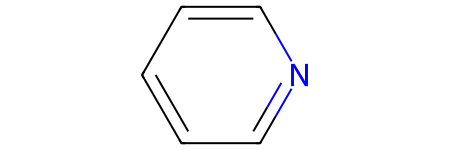

In [40]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))
Chem.MolFromSmiles('n1ccccc1')

## MDL SDF 파일 읽기 (Reading sets of molecules)

MDL SD 파일은 "Mol 파일 묶음 + 분자 속성"을 가진 파일입니다.

In [41]:
from urllib.request import urlopen
theSdfUrl = 'https://raw.githubusercontent.com/youngmook/cheminfo-python/main/in-stock%2Bfor-sale.sdf'

with urlopen(theSdfUrl) as theStream:
  theSdf = theStream.read().decode()
  pass

print(theSdf.split('$$$$')[0])


     RDKit          3D

 25 28  0  0  0  0  0  0  0  0999 V2000
   -1.9187   -1.7530    0.7656 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5058   -0.7929    0.2316 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9590   -0.8400    0.1022 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7112    0.2651   -0.1854 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0778    0.2194   -0.3091 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.7477   -0.9842   -0.1404 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0009   -2.1023    0.1500 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6121   -2.0397    0.2720 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8376    0.3831   -0.2808 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3843    1.6333   -0.3153 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7124    2.7450   -0.8045 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4384    2.5527   -1.2690 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1658    1.3305   -1.2621 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5292    0.2366   -0

In [42]:
with open('in-stock+for-sale.sdf', 'w') as theWriter:
  theWriter.write(theSdf)
  pass
  

In [43]:
theSDMolSupplier = Chem.SDMolSupplier('in-stock+for-sale.sdf')

theZincMolList = []

for ithMol in theSDMolSupplier :
  theZincMolList.append(ithMol)
  pass

theZincMolList[0:10]

In [44]:
print(theZincMolList[0].GetProp("zinc_id"))

ZINC000000035284


In [45]:
print(Chem.MolToMolBlock(theZincMolList[0]))


     RDKit          3D

 25 28  0  0  0  0  0  0  0  0999 V2000
   -1.9187   -1.7530    0.7656 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5058   -0.7929    0.2316 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9590   -0.8400    0.1022 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7112    0.2651   -0.1854 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0778    0.2194   -0.3091 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.7477   -0.9842   -0.1404 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0009   -2.1023    0.1500 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6121   -2.0397    0.2720 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8376    0.3831   -0.2808 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3843    1.6333   -0.3153 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7124    2.7450   -0.8045 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4384    2.5527   -1.2690 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1658    1.3305   -1.2621 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5292    0.2366   -0

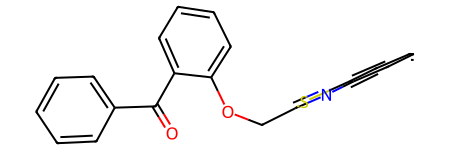

In [46]:
theZincMolList[0]

In [47]:
show3DMol(theZincMolList[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [48]:
show3DMolWithOptimization(theZincMolList[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## 분자 그림 파일 만들기

In [49]:
from rdkit.Chem import Draw


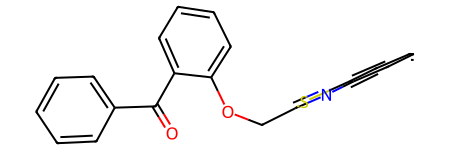

In [50]:
Draw.MolToFile(theZincMolList[0], 'zinc-001.png')
theZincMolList[0]

2D 구조 최적화 후 그림 저장

In [51]:
import copy
theFirstZincMol = copy.deepcopy(theZincMolList[0])
AllChem.Compute2DCoords(theFirstZincMol)


0

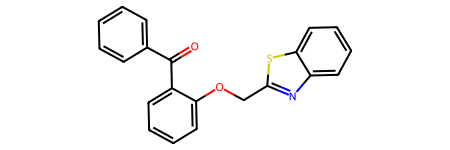

In [52]:
Draw.MolToFile(theFirstZincMol, 'zinc-001-2D.png')
theFirstZincMol

여러 분자를 Grid 형태로 저장



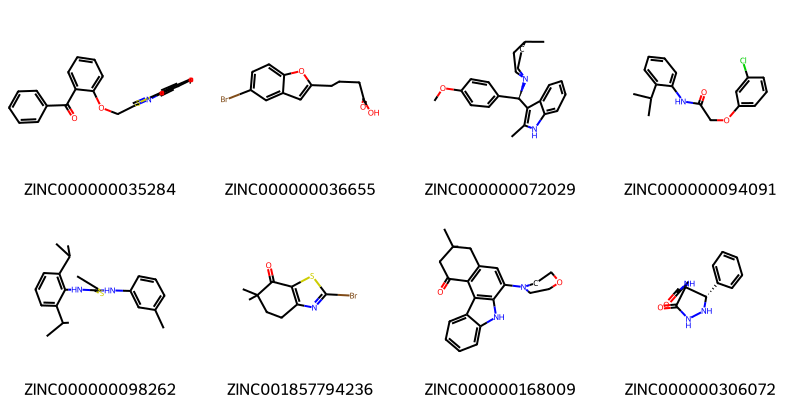

In [53]:
theGridImage = Draw.MolsToGridImage(theZincMolList[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theZincMolList[:8]], returnPNG=False)    
theGridImage.save('zinc-grid-001-008.png')
theGridImage

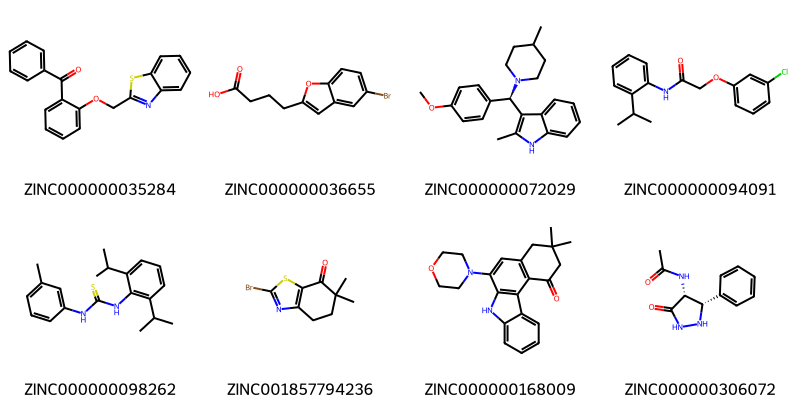

In [54]:
for ithMol in theZincMolList:
  AllChem.Compute2DCoords(ithMol)
  pass

theGridImage = Draw.MolsToGridImage(theZincMolList[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theZincMolList[:8]], returnPNG=False)    
theGridImage.save('zinc-grid-001-008-2D.png')
theGridImage

Sub structure를 가진 화합물 찾아 그림으로 저장

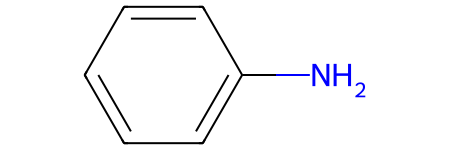

In [55]:
theCommonCoreMol = Chem.MolFromSmiles('Nc1ccccc1')
theCommonCoreMol

In [56]:
#theSubZincMolList = [x for x in theZincMolList if x.HasSubstructMatch(theCommonCoreMol)]

theSubMatchedMolList = []
for ithMol in theZincMolList:
  if (ithMol.HasSubstructMatch(theCommonCoreMol)):
    theSubMatchedMolList.append(ithMol)
    pass
  pass

print('# of total molecule list : ' + str(len(theZincMolList)))
print('# of matched molecules : ' + str(len(theSubMatchedMolList)))


# of total molecule list : 100
# of matched molecules : 48


In [57]:
AllChem.Compute2DCoords(theCommonCoreMol)

for ithMatchedMol in theSubMatchedMolList:
  _ = AllChem.GenerateDepictionMatching2DStructure(ithMatchedMol,theCommonCoreMol)    

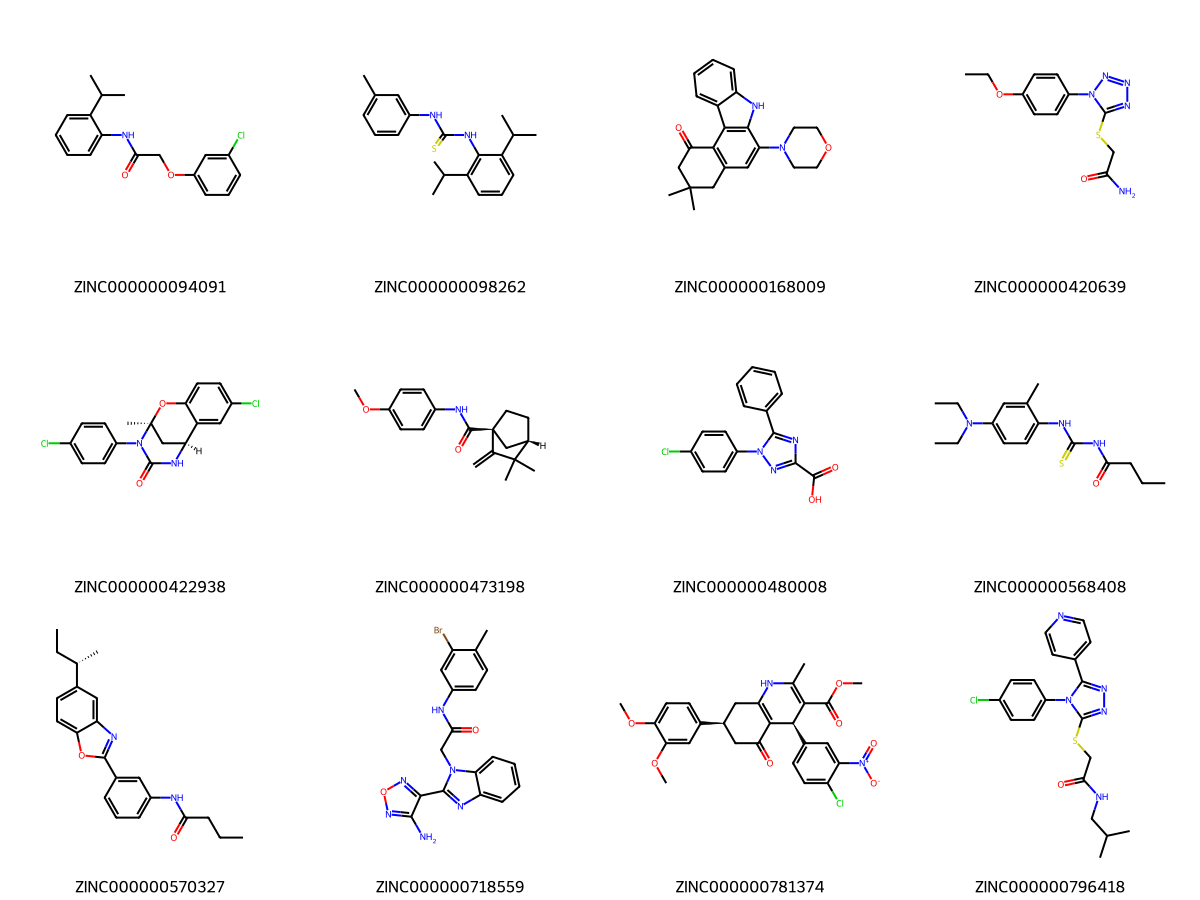

In [58]:
theMatchedGridImage = Draw.MolsToGridImage(theSubMatchedMolList[:12],molsPerRow=4,subImgSize=(300,300),legends=[x.GetProp("zinc_id") for x in theSubMatchedMolList], returnPNG=False)    
theMatchedGridImage.save('zinc-matched-grid.png') 
theMatchedGridImage

## Substructure 검색

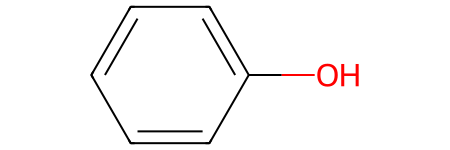

In [59]:
theMolecule = Chem.MolFromSmiles('c1ccccc1O')
theMolecule



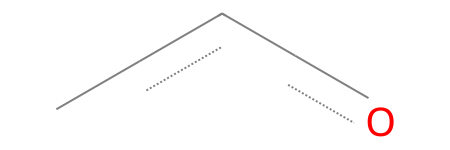

In [60]:
thePattern = Chem.MolFromSmarts('ccO')
thePattern

In [61]:
theMolecule.HasSubstructMatch(thePattern)

True

In [62]:
theMolecule.GetSubstructMatch(thePattern)

(0, 5, 6)

In [63]:
theMolecule.GetSubstructMatches(thePattern)

((0, 5, 6), (4, 5, 6))

In [64]:
theMatchedMolList = []
for ithZincMol in theZincMolList:
  if ithZincMol.HasSubstructMatch(thePattern):
    theMatchedMolList.append(ithZincMol)

print(len(theMatchedMolList))

41


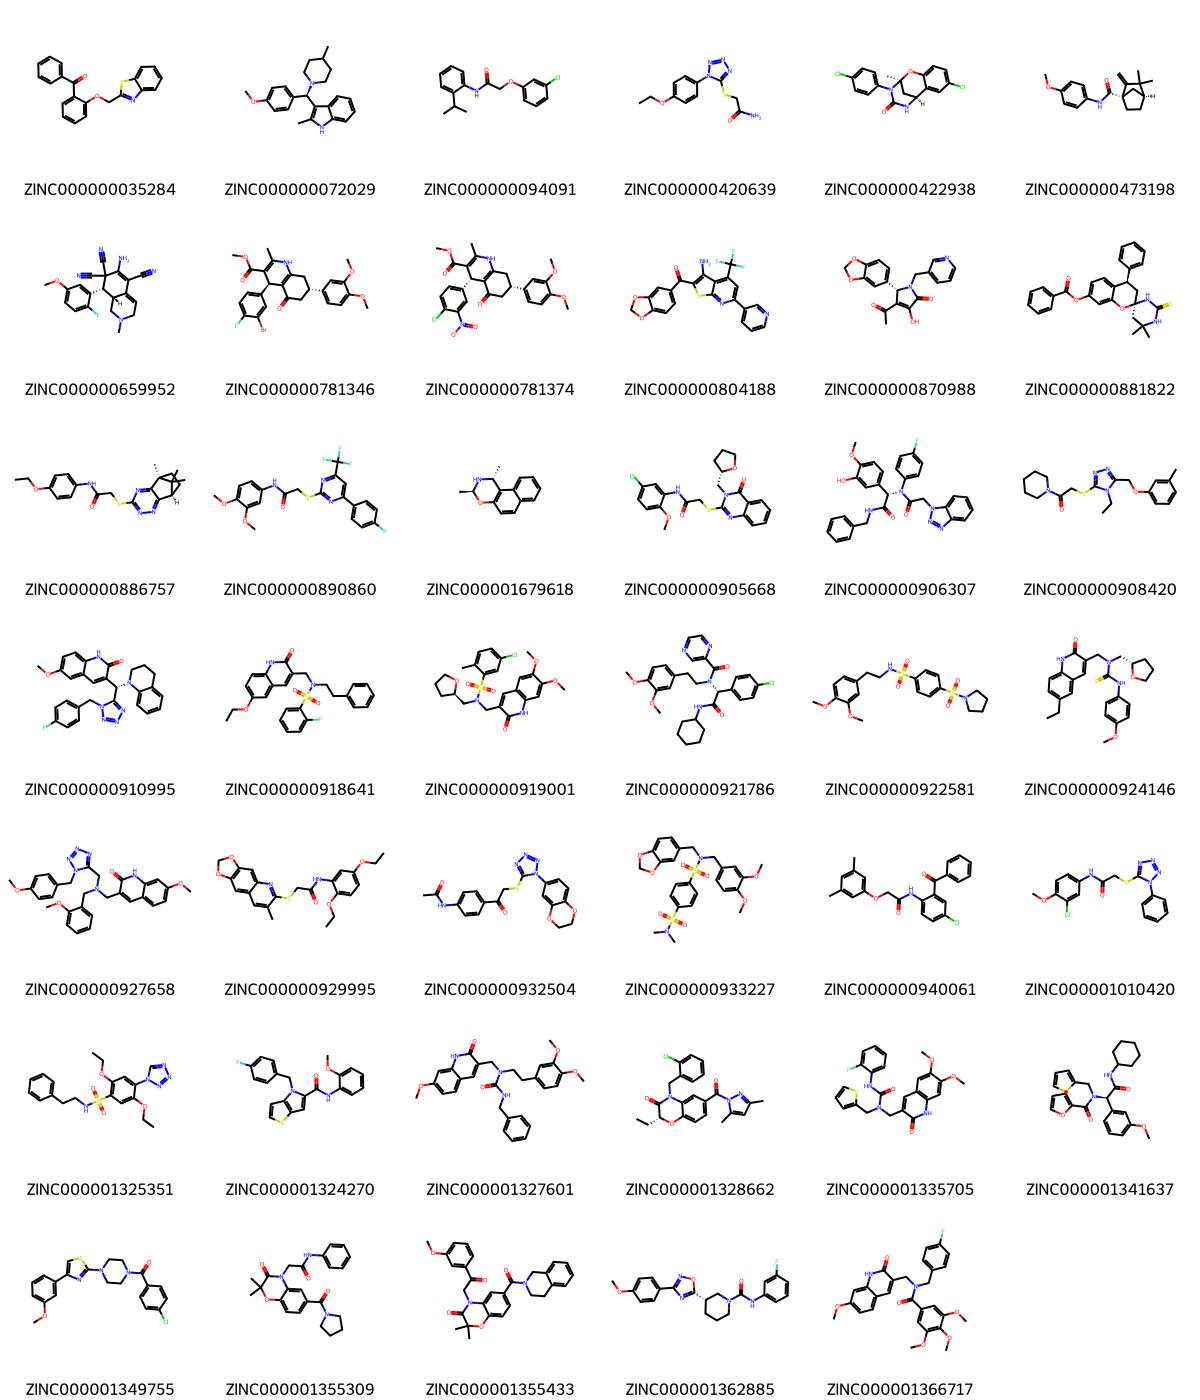

In [65]:
for ithMol in theMatchedMolList:
  AllChem.Compute2DCoords(ithMol)
  pass

theGridImage = Draw.MolsToGridImage(theMatchedMolList,molsPerRow=6,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theMatchedMolList], returnPNG=False)    
theGridImage.save('zinc-substr-matched-grid-2D.png')
theGridImage

## Chemical Transformations

Substructure-based Transformations

* Deleting substructure

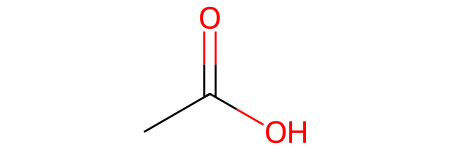

In [66]:
theMol = Chem.MolFromSmiles('CC(=O)O')
theMol

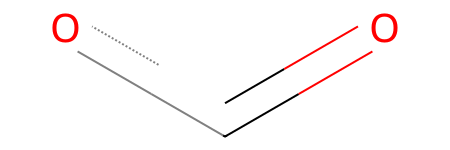

In [67]:
thePattern = Chem.MolFromSmarts('C(=O)[OH]')
thePattern

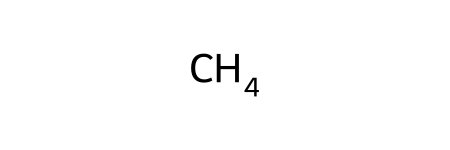

In [68]:
theRemovedMol = AllChem.DeleteSubstructs(theMol,thePattern)
theRemovedMol

* Replacing substructure

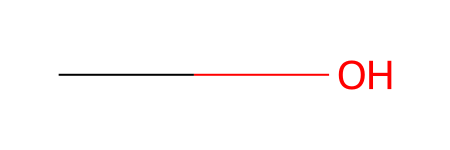

In [69]:
theReplaceMol = Chem.MolFromSmiles('OC')
theReplaceMol

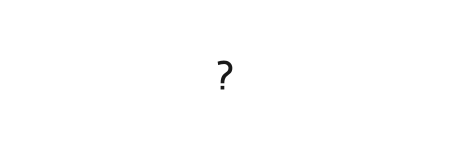

In [70]:
thePattern = Chem.MolFromSmarts('[$(NC(=O))]')
thePattern

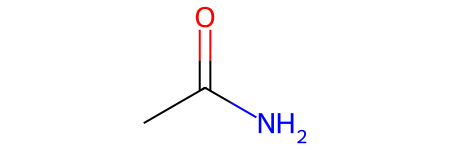

In [71]:
theMol = Chem.MolFromSmiles('CC(=O)N')
theMol

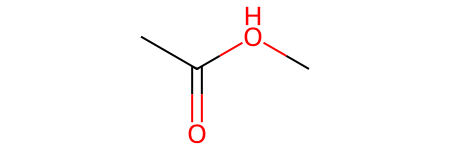

In [72]:
AllChem.ReplaceSubstructs(theMol,thePattern,theReplaceMol)[0]


## Fingerprinting and Molecular Similarity


In [73]:
from rdkit import DataStructs

첫번째 분자와 나머지 분자의 유사도 계산

In [74]:
theFingerprintList = [Chem.RDKFingerprint(x) for x in theZincMolList]
for idx, ithFingerprint in enumerate(theFingerprintList):
  if idx == 0 : continue
  ithSimilarity = DataStructs.FingerprintSimilarity(theFingerprintList[0], theFingerprintList[idx])
  print(idx, ithSimilarity)

1 0.16019417475728157
2 0.32099758648431215
3 0.23923923923923923
4 0.17231075697211157
5 0.24149659863945577
6 0.29102384291725103
7 0.20123565754633715
8 0.1726479146459748
9 0.2333984375
10 0.21395348837209302
11 0.3170266836086404
12 0.24427480916030533
13 0.24572317262830481
14 0.14798694232861806
15 0.1914257228315055
16 0.2785425101214575
17 0.3434547908232119
18 0.30604982206405695
19 0.32371794871794873
20 0.3335419274092616
21 0.2857142857142857
22 0.24226415094339623
23 0.3796825396825397
24 0.24062772449869224
25 0.3014065639651708
26 0.21099290780141844
27 0.22090059473237042
28 0.30455153949129854
29 0.3102766798418972
30 0.2858187134502924
31 0.34825174825174826
32 0.2917547568710359
33 0.2869496855345912
34 0.29353562005277045
35 0.2564575645756458
36 0.3215767634854772
37 0.3315614617940199
38 0.27180966113914923
39 0.29862306368330466
40 0.33941605839416056
41 0.2719298245614035
42 0.267221801665405
43 0.3039426523297491
44 0.3253652058432935
45 0.3108359133126935
46 

Fingerprint 이미지 만들기

In [75]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
bi[872]

((6, 2),)

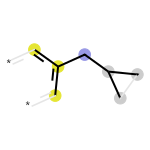

In [76]:
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
mfp2_svg

In [77]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]

[[0, 1, 9, 5, 4], [2, 3, 4, 9, 5]]

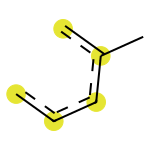

In [78]:
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)
rdk_svg

In [79]:
import requests
theLogSDataFileUrl = 'https://raw.githubusercontent.com/youngmook/cheminfo-python/main/logS-data.sdf'

theResponse = requests.get(theLogSDataFileUrl, allow_redirects=True)
with open('logS-data.sdf', 'wb') as theWriter:
  theWriter.write(theResponse.content)



In [80]:
theSDMolSupplier = Chem.SDMolSupplier('logS-data.sdf')

theMolList = []

for ithMol in theSDMolSupplier :
  theMolList.append(ithMol)
  pass

theMolList[0:10]

In [81]:
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Dense,
    Dropout,
)


In [82]:
def molToFingerprintList(mol):
  return np.append(Fingerprinter.FingerprintMol(mol)[0],Descriptors.MolWt(mol))

In [83]:
X = []
y = []
for ithMol in theMolList:
  X.append(molToFingerprintList(ithMol))
  y.append(float(ithMol.GetProp('logS')))
X = np.array(X)
y = np.array(y)
X

array([[  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 665.733],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 589.64 ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 528.582],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 206.266],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 218.321],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 141.086]])

In [84]:
theStandardScaler = StandardScaler()
X= theStandardScaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.99449515],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.36520251],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.08054434],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.86357368],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.62097486],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.04418619]])

In [86]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1, activation='linear'))

In [87]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               41472     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 1024)              263168    
                                                                 
 dense_5 (Dense)             (None, 512)               5

In [88]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True))


In [89]:
#history = model.fit(X_train, y_train, nb_epoch=500, batch_size=32)
history = model.fit(
    X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test)
)

Epoch 1/50
33/33 [==============================] - 3s 39ms/step - loss: 5.5057 - val_loss: 1.9294
Epoch 2/50
33/33 [==============================] - 1s 36ms/step - loss: 1.4088 - val_loss: 1.1854
Epoch 3/50
33/33 [==============================] - 1s 42ms/step - loss: 0.9225 - val_loss: 0.9052
Epoch 4/50
33/33 [==============================] - 2s 51ms/step - loss: 0.7008 - val_loss: 0.7837
Epoch 5/50
33/33 [==============================] - 1s 34ms/step - loss: 0.6075 - val_loss: 0.7349
Epoch 6/50
33/33 [==============================] - 1s 31ms/step - loss: 0.5256 - val_loss: 0.6829
Epoch 7/50
33/33 [==============================] - 1s 32ms/step - loss: 0.4697 - val_loss: 0.6252
Epoch 8/50
33/33 [==============================] - 1s 35ms/step - loss: 0.4207 - val_loss: 0.6174
Epoch 9/50
33/33 [==============================] - 1s 32ms/step - loss: 0.3772 - val_loss: 0.5838
Epoch 10/50
33/33 [==============================] - 1s 33ms/step - loss: 0.3383 - val_loss: 0.5544
Epoch 11/

11/11 [==============================] - 0s 3ms/step


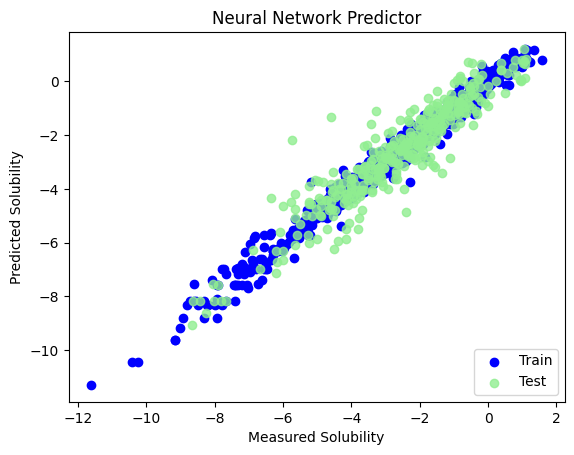

In [90]:
import matplotlib.pyplot as plt

plt.scatter(y_train,model.predict(X_train), label = 'Train', c='blue')
plt.title('Neural Network Predictor')
plt.xlabel('Measured Solubility')
plt.ylabel('Predicted Solubility')
plt.scatter(y_test,model.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.show()